# Data Exploration and Procesing

In [1]:
pip install fireducks

  Using cached firefw-1.1.7-py3-none-any.whl.metadata (818 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 6.5 MB/s eta 0:00:000:00:01m eta 0:00:01
Using cached firefw-1.1.7-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [52]:
import fireducks.pandas as pd

ts = pd.read_excel('../data/raw_data2.xlsx')
ts.head()

,TIME,PV1_Voltage,PV1_Current,PV2_Voltage,PV2_Current,PV3_Voltage,InputPower,Power
0,2023-01-01 01:20:00,0.0,0.0,0,0.0,0,0.0,2.572
1,2023-01-01 01:22:00,0.0,0.0,0,0.0,0,0.0,2.569
2,2023-01-01 01:24:00,0.0,0.0,0,0.0,0,0.0,2.570
3,2023-01-01 01:26:00,0.0,0.0,0,0.0,0,0.0,2.535
4,2023-01-01 01:28:00,0.0,0.0,0,0.0,0,0.0,2.465


<Axes: >

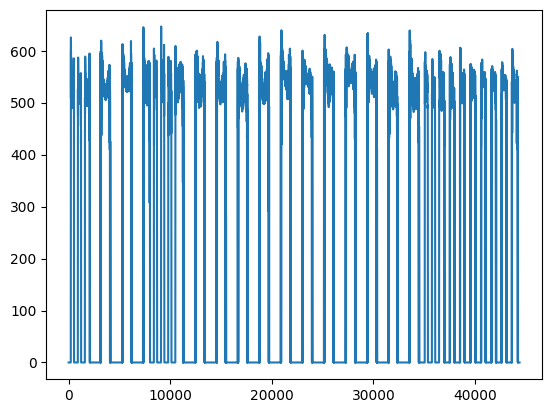

In [53]:
ts["PV1_Voltage"].plot()

In [55]:
def continuous_sequences(df):
    """Add continuous sequence numbers for non-zero records"""
    features = ['PV1_Voltage', 'PV1_Current', 'PV2_Voltage', 'PV2_Current', 'PV3_Voltage', 'InputPower']
    
    # Create mask for non-zero rows
    non_zero = ~df[features].eq(0).all(axis=1)
    
    # Create sequence numbers
    df['sequence'] = 0
    changes = (non_zero != non_zero.shift()).cumsum()
    
    # Only for non-zero rows, assign consecutive numbers
    non_zero_changes = changes[non_zero].unique()
    sequence_map = dict(zip(non_zero_changes, range(1, len(non_zero_changes) + 1)))
    df.loc[non_zero, 'sequence'] = changes[non_zero].map(sequence_map)
    
    # Keep only non-zero rows
    df = df[df['sequence'] != 0].copy()
    
    # Save to parquet
    df.to_parquet('../data/sequences.parquet')
    return df

In [56]:
ts1=continuous_sequences(ts)

In [57]:
ts1['sequence'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [58]:
ts1

,TIME,PV1_Voltage,PV1_Current,PV2_Voltage,PV2_Current,PV3_Voltage,InputPower,Power,sequence
211,2023-01-01 08:22:00,499.6,0.04,0,0.0,0,0.000,2.385,1
212,2023-01-01 08:24:00,499.6,0.04,0,0.0,0,0.000,2.395,1
213,2023-01-01 08:26:00,499.6,0.04,0,0.0,0,0.000,2.394,1
214,2023-01-01 08:28:00,499.6,0.04,0,0.0,0,0.000,2.411,1
215,2023-01-01 08:30:00,499.6,0.04,0,0.0,0,0.000,2.483,1
...,...,...,...,...,...,...,...,...,...
44210,2023-01-31 19:22:00,488.5,0.09,0,0.0,0,0.017,0.017,491
44211,2023-01-31 19:24:00,488.5,0.09,0,0.0,0,0.017,0.017,491
44212,2023-01-31 19:26:00,465.7,0.04,0,0.0,0,0.000,0.000,491
44213,2023-01-31 19:28:00,465.7,0.04,0,0.0,0,0.000,0.000,491


In [63]:

import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [64]:
df=ts1.copy()

df['TIME'] = pd.to_datetime(df['TIME'])
df.set_index('TIME', inplace=True)
df.sort_index(inplace=True)

# Let's look at the data
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20041 entries, 2023-01-01 08:22:00 to 2023-01-31 19:30:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PV1_Voltage  20041 non-null  float64
 1   PV1_Current  20041 non-null  float64
 2   PV2_Voltage  20041 non-null  int64  
 3   PV2_Current  20041 non-null  float64
 4   PV3_Voltage  20041 non-null  int64  
 5   InputPower   20041 non-null  float64
 6   Power        19681 non-null  float64
 7   sequence     20041 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.4 MB
None

First few rows:
                     PV1_Voltage  PV1_Current  PV2_Voltage  PV2_Current  \
TIME                                                                      
2023-01-01 08:22:00        499.6         0.04            0          0.0   
2023-01-01 08:24:00        499.6         0.04            0          0.0   
2023-01-01 08:26:00        499.6         0.04      

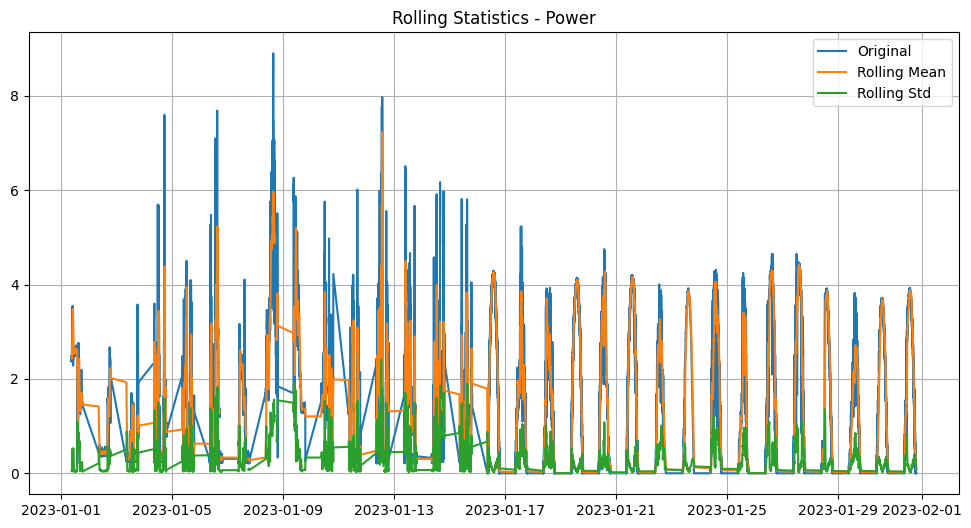


Dickey-Fuller Test Results:
Test Statistic                -7.855418e+00
p-value                        5.459349e-12
#Lags Used                     4.500000e+01
Number of Observations Used    1.963500e+04
Critical Value (1%)           -3.430683e+00
Critical Value (5%)           -2.861687e+00
Critical Value (10%)          -2.566848e+00
dtype: float64

Conclusion: Series is stationary (reject H0)


In [65]:
# Cell 4: Function to check stationarity using Augmented Dickey-Fuller test
def check_stationarity(series, title=''):
    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    
    # Original series
    plt.plot(series, label='Original')
    
    # Rolling mean
    rolling_mean = series.rolling(window=24).mean()
    plt.plot(rolling_mean, label='Rolling Mean')
    
    # Rolling std
    rolling_std = series.rolling(window=24).std()
    plt.plot(rolling_std, label='Rolling Std')
    
    plt.title(f'Rolling Statistics - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Perform Dickey-Fuller test
    print('\nDickey-Fuller Test Results:')
    dftest = adfuller(series.dropna())
    
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            'Test Statistic',
            'p-value',
            '#Lags Used',
            'Number of Observations Used'
        ]
    )
    
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    
    print(dfoutput)
    
    # Interpret results
    if dftest[1] <= 0.05:
        print("\nConclusion: Series is stationary (reject H0)")
    else:
        print("\nConclusion: Series is non-stationary (fail to reject H0)")

# Apply the function to Power column
check_stationarity(df['Power'], 'Power')

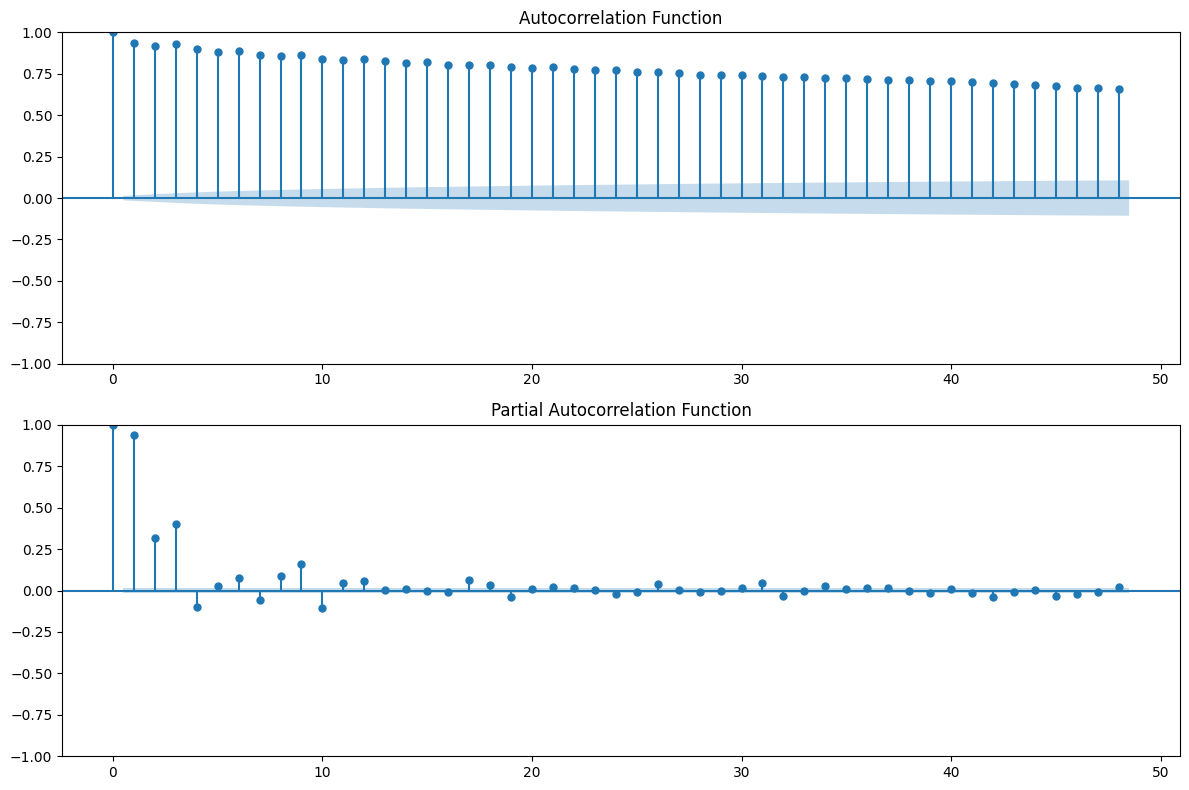


First few autocorrelation values:
0    0.938051
1    0.918309
2    0.929395
3    0.899920
4    0.884653
dtype: float64


In [66]:
# Cell 5: Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(df['Power'].dropna(), lags=48, ax=ax1)
ax1.set_title('Autocorrelation Function')

# Plot PACF
plot_pacf(df['Power'].dropna(), lags=48, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Print some key autocorrelation values
print("\nFirst few autocorrelation values:")
acf_values = pd.Series(df['Power'].autocorr(lag=i) for i in range(1, 6))
print(acf_values)